## Observations and Insights 

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer')
data_df.head()


# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
#!pip install matplotlib
#!pip install scipy

In [12]:
# Checking the number of mice.
mice=data_df["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
alldup_mice_df = data_df.loc[data_df["Mouse ID"] == "g989", :]
alldup_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = data_df[data_df['Mouse ID'].isin(alldup_mice_df)==False]
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice in the clean DataFrame.
clean_mice=cleaned_df["Mouse ID"].value_counts()
number_of_clean_mice=len(clean_mice)
number_of_clean_mice

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
variance = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
standard_deviation = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
drugGroup = cleaned_df.groupby('Drug Regimen')

grouped_together = pd.DataFrame({"Tumor Volume Mean":mean, "Tumor Volume Median":median, "Tumor Volume Variance":variance, "Tumor Volume standard Deviation":standard_deviation, "Tumor Volume Error":sem})
grouped_together

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume standard Deviation,Tumor Volume Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    #grouped_together is all of them together
# Using the aggregation method, produce the same summary statistics in a single line

aggregation  = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Trials')

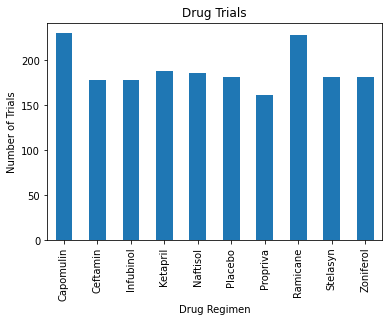

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
group_together = pd.DataFrame(cleaned_df.groupby(['Drug Regimen']).count()).reset_index()
total_count = group_together[['Drug Regimen', 'Mouse ID']]
total_count.columns = ['Drug Regimen', 'Number of Trials']
total_count = total_count.set_index('Drug Regimen')
fig1 = total_count.plot(kind='bar', title='Drug Trials', legend=False)
fig1.set_ylabel('Number of Trials')


Text(0.5, 1.0, 'Mice on Drugs')

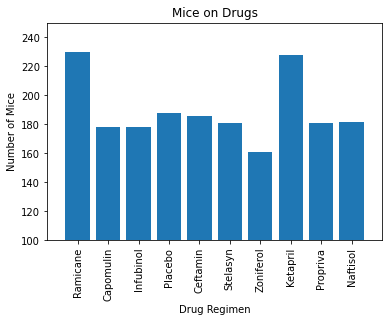

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
xaxis = cleaned_df['Drug Regimen'].unique().tolist()
yaxis = drugGroup['Mouse ID'].count().tolist()
plt.bar(xaxis, yaxis)
plt.xlim(-1, 10)
plt.xticks(rotation = 90)
plt.ylim(100, 250)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Mice on Drugs')


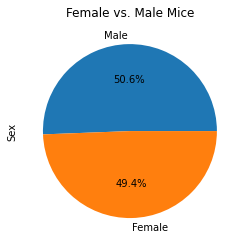

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = cleaned_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()


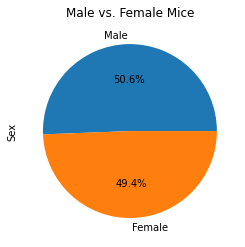

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs. Female Mice')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_timepoint = data_df.groupby("Mouse ID").max()["Timepoint"]
great_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
great_timepoint_merged =pd.merge(data_df, great_timepoint, how = "right", on = ["Mouse ID","Timepoint"])
great_timepoint_merged



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z578,Ramicane,Male,11,16,45,30.638696,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
#treats = data_df.groupby("Mouse ID").max() ["Drug Regimen"].unique().tolist()
#treats
treat_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumore_val_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treaments in treat_list:


#data_df.groupby("Drug Regimen").quantile([.25, .5, .75])["Tumor Volume (mm3)"]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumore_valume = great_timepoint_merged.loc[great_timepoint_merged["Drug Regimen"]==treaments,'Tumor Volume (mm3)']
    #print(treaments)
    #print(tumore_valume)
    # add subset 
    
    tumore_val_data.append(tumore_valume)
    
    
    # Determine outliers using upper and lower bounds
    qua = tumore_valume.quantile([.25,.5,.75])
    lower = qua[0.25]
    high = qua[0.75]
    diffrence = high-lower
    low_bound = lower-1.5*diffrence
    upper_bound = high+1.5*diffrence
    #outlier = tumore_valume.loc((tumore_valume<low_bound)|(tumore_valume>upper_bound))
    print(low_bound)
    print(upper_bound)
    print(tumore_valume<low_bound)
    print(tumore_valume>upper_bound)
    print((tumore_valume<low_bound)|(tumore_valume>upper_bound))

    

20.70456164999999
51.83201549
19     False
24     False
61     False
64     False
66     False
81     False
84     False
86     False
88     False
109    False
116    False
122    False
125    False
163    False
164    False
170    False
175    False
181    False
184    False
193    False
205    False
209    False
221    False
227    False
240    False
Name: Tumor Volume (mm3), dtype: bool
19     False
24     False
61     False
64     False
66     False
81     False
84     False
86     False
88     False
109    False
116    False
122    False
125    False
163    False
164    False
170    False
175    False
181    False
184    False
193    False
205    False
209    False
221    False
227    False
240    False
Name: Tumor Volume (mm3), dtype: bool
19     False
24     False
61     False
64     False
66     False
81     False
84     False
86     False
88     False
109    False
116    False
122    False
125    False
163    False
164    False
170    False
175    False
181    False
184    Fal

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
